In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/emoji_data.csv",encoding="utf-8")

In [3]:
df.head()


,index,emoji,name,group,sub_group,codepoints
0,0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       4159 non-null   int64 
 1   emoji       4159 non-null   object
 2   name        4159 non-null   object
 3   group       4159 non-null   object
 4   sub_group   4159 non-null   object
 5   codepoints  4159 non-null   object
dtypes: int64(1), object(5)
memory usage: 195.1+ KB


In [5]:
df.describe()

,index
count,4159.000000
mean,2079.000000
std,1200.744214
min,0.000000
25%,1039.500000
50%,2079.000000
75%,3118.500000
max,4158.000000


In [6]:
df["group"].value_counts()

People & Body        2485
Symbols               301
Objects               299
Flags                 275
Travel & Places       264
Smileys & Emotion     162
Animals & Nature      147
Food & Drink          131
Activities             95
Name: group, dtype: int64

In [7]:
plot_data = df.loc[df['group'].str.contains("food", case=False)]

In [8]:
for i in plot_data["emoji"]:
    print(i,end=" ")

🍇 🍈 🍉 🍊 🍋 🍌 🍍 🥭 🍎 🍏 🍐 🍑 🍒 🍓 🫐 🥝 🍅 🫒 🥥 🥑 🍆 🥔 🥕 🌽 🌶️ 🌶 🫑 🥒 🥬 🥦 🧄 🧅 🍄 🥜 🌰 🍞 🥐 🥖 🫓 🥨 🥯 🥞 🧇 🧀 🍖 🍗 🥩 🥓 🍔 🍟 🍕 🌭 🥪 🌮 🌯 🫔 🥙 🧆 🥚 🍳 🥘 🍲 🫕 🥣 🥗 🍿 🧈 🧂 🥫 🍱 🍘 🍙 🍚 🍛 🍜 🍝 🍠 🍢 🍣 🍤 🍥 🥮 🍡 🥟 🥠 🥡 🦀 🦞 🦐 🦑 🦪 🍦 🍧 🍨 🍩 🍪 🎂 🍰 🧁 🥧 🍫 🍬 🍭 🍮 🍯 🍼 🥛 ☕ 🫖 🍵 🍶 🍾 🍷 🍸 🍹 🍺 🍻 🥂 🥃 🥤 🧋 🧃 🧉 🧊 🥢 🍽️ 🍽 🍴 🥄 🔪 🏺 

In [80]:
plot_data[plot_data["sub_group"]=="food-fruit"]['emoji']

2794    🍇
2795    🍈
2796    🍉
2797    🍊
2798    🍋
2799    🍌
2800    🍍
2801    🥭
2802    🍎
2803    🍏
2804    🍐
2805    🍑
2806    🍒
2807    🍓
2808    🫐
2809    🥝
2810    🍅
2811    🫒
2812    🥥
Name: emoji, dtype: object

In [9]:
pip install emojis matplotlib wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


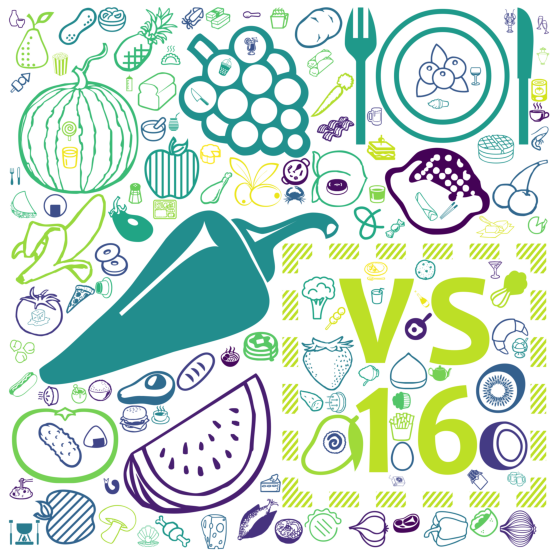

In [10]:
from os import path
import string
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from wordcloud import WordCloud
# Generate a word cloud image
# The Symbola font includes most emoji

emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{emoji}".format(emoji=emoji)
text = " ".join(plot_data['emoji'])
word_cloud = WordCloud(font_path="fonts/symbola.otf",width=2000,
                               height=2000,
                               background_color='white',regexp=regexp,collocations=True).generate(text)
# Display the generated image:
plt.figure( figsize=(10,10) )
plt.imshow(word_cloud)

plt.axis("off")
plt.show()




In [11]:
plot_data.head()

,index,emoji,name,group,sub_group,codepoints
2794,2794,🍇,grapes,Food & Drink,food-fruit,1F347
2795,2795,🍈,melon,Food & Drink,food-fruit,1F348
2796,2796,🍉,watermelon,Food & Drink,food-fruit,1F349
2797,2797,🍊,tangerine,Food & Drink,food-fruit,1F34A
2798,2798,🍋,lemon,Food & Drink,food-fruit,1F34B


In [12]:
improve_text_position(plot_data['emoji']

SyntaxError: unexpected EOF while parsing (2028432729.py, line 1)

In [77]:
import plotly.express as px

fig = px.scatter(data_frame=plot_data,x="sub_group",text="emoji", hover_name='name',title="Sub_group wize emojis for your selected group")
fig.update_traces(textposition =['top left'],textfont_size=25)
fig.show()